In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab as py
import numpy as np
from imp import reload
import pixie_read_st as pxr

In [7]:
plt.style.use('ggplot')
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'heavy'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['text.usetex']=True

In [8]:
filepath = "/net/scratch3/giannis_kx/pixie3d/tests/bonfiglio_div_tok/sawtooth2.scratch/pixie3d.h5"

In [10]:
pxr.pixieload(filepath)

timesteps= 632
Dictionary of terms:
Variables: ['Car_variables', 'Cnv_variables', 'Cov_variables', 'Diagnostics', 'Perturbations', 'cells', 'nodes']
Cartesian: ['Bx', 'By', 'Bz', 'Jx', 'Jy', 'Jz', 'Prs', 'Ve_1', 'Ve_2', 'Ve_3', 'Vx', 'Vy', 'Vz', 'rho']
Contravariant: ['B^1', 'B^2', 'B^3', 'J*P^2', 'J.(pi+pe)', 'J.Rho', 'J^1', 'J^2', 'J^3', 'P^1', 'P^3']
Covariant: ['B_1', 'B_2', 'B_3', 'J_1', 'J_2', 'J_3', 'T=Te+Ti', 'V_1', 'V_2', 'V_3', 'rho']
Diagnostic: ['E_1', 'E_2', 'E_3', 'Int. heat src', 'Poloidal flux', 'Temperature', 'chi par', 'chi perp', 'diff', 'eta', 'lambda', 'local div(B)', 'local div(J)', 'local div(V)', 'nu', 'q factor']
Perturbations: ['B^1_pert', 'B^2_pert', 'B^3_pert', 'P^1_pert', 'P^2_pert', 'P^3_pert', 'Prs_pert', 'Rho_pert']
Cell: ['X', 'Y', 'Z']
Node: ['X', 'Y', 'Z']


In [75]:
reload(pxr)

<module 'pixie_read_st' from '/turquoise/users/giannis_kx/python_pixie/pixie_read_st.py'>

In [11]:
pxr.X.shape

(129, 65, 65)

In [12]:
B1 = pxr.load_array(1,0,None,3)
B2 = pxr.load_array(1,1,None,3)
B3 = pxr.load_array(1,2,None,3)

In [13]:
psi_pol = pxr.load_array(3,4,None,3)

In [14]:
psi_pol.shape

(129, 65, 65, 3)

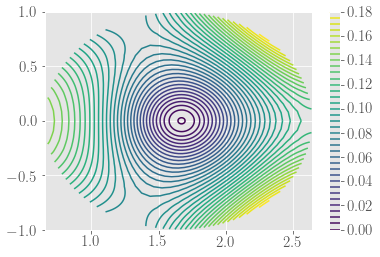

In [15]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],-psi_pol[:,:,0,0],40)
plt.colorbar()
plt.show()

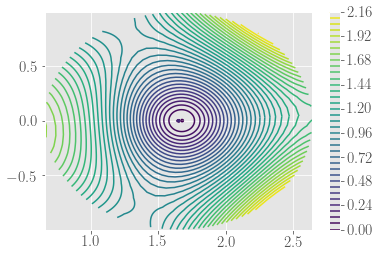

In [31]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],pxr.P_N[:,:,0,0],40)
plt.colorbar()
plt.show()

In [30]:
pxr.Initial_Psi_Normalization(-psi_pol)

Initial psi normalization done...


In [29]:
reload(pxr)

<module 'pixie_read_st' from '/turquoise/users/giannis_kx/python_pixie/pixie_read_st.py'>

In [26]:
pxr.Load_Dictionary()

Dictionary loaded.


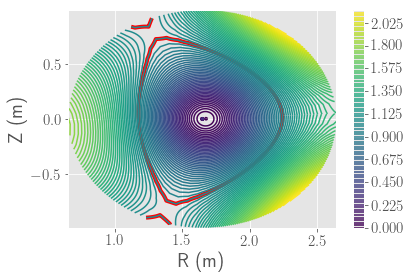

If the separatrix is in red, test passed.


In [32]:
pxr.test_psi_normalization()

In [78]:
tcp = pxr.new_coords(pxr.loaded,pxr.B1_int,2)

In [39]:
k=list(pxr.loaded.keys())

In [47]:
k[0][0]

'0.00235876824757'

In [50]:
pxr.loaded[k[40][0],"0"]['r_l'](0.6)

array(0.4234107275438882)

In [85]:
reload(pxr)

<module 'pixie_read_st' from '/turquoise/users/giannis_kx/python_pixie/pixie_read_st.py'>

In [57]:
pxr.Axes_of_Interpolation(pxr.P_N,B1)
pxr.Grid_Interpolations(B1,B2,B3)
pxr.Grids_Creation()
pxr.Grid_Evaluations()

Logical Grid Interpolations done. All array (A) interpolators take A_int.
Logical Grid Evaluations done. All grid evaluated interpolators take A_grid.


In [30]:
tcp = pxr.new_coords(pxr.loaded,pxr.B1_int,3)

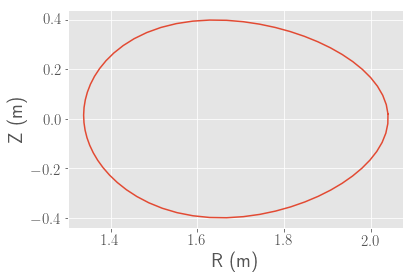

In [64]:
pxr.test_locator(0.6)

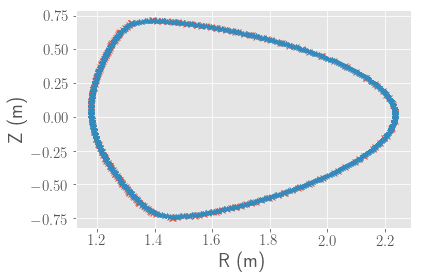

In [83]:
pxr.test_integrator(0.99)

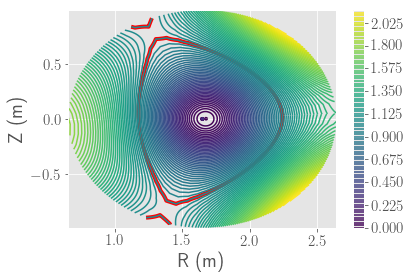

If the separatrix is in red, test passed.


In [66]:
pxr.test_psi_normalization()

In [87]:
reload(pxr)

<module 'pixie_read_st' from '/turquoise/users/giannis_kx/python_pixie/pixie_read_st.py'>

In [ ]:
q,p = pxr.q_prof_no_dict()

psi =  0.01
psi =  0.02
psi =  0.03
psi =  0.04
psi =  0.05
psi =  0.06
psi =  0.07
psi =  0.08
psi =  0.09
psi =  0.1
psi =  0.11
psi =  0.12
psi =  0.13
psi =  0.14
psi =  0.15
psi =  0.16
psi =  0.17
psi =  0.18
psi =  0.19
psi =  0.2
psi =  0.21
psi =  0.22
psi =  0.23
psi =  0.24
psi =  0.25
psi =  0.26
psi =  0.27
psi =  0.28
psi =  0.29


In [69]:
pxr.test_psi_projection()

IndexError: tuple index out of range

In [79]:
#Ps = np.linspace((np.amin(-psi_pol[:,:,0,0])-pxr.psi_min)/pxr.norm,(np.amax(-psi_pol[:,:,0])-pxr.psi_min)/pxr.norm,100)
Ps = np.linspace(0.0,1.0,100)
Tf = np.linspace(0.0,2.0*np.pi,100)
(PS,TF) = np.meshgrid(Ps,Tf)

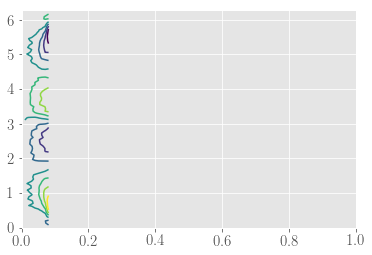

In [80]:
plt.contour(PS,TF,tcp(PS,TF))
plt.show()

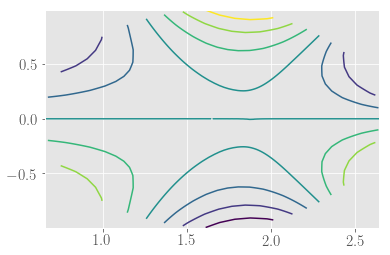

In [35]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],B1[:,:,0,3])
plt.show()

In [41]:
(np.amax(pxr.P_N)-pxr.psi_min)/pxr.norm

26.269855933989493

In [39]:
pxr.norm

0.08227480225592361

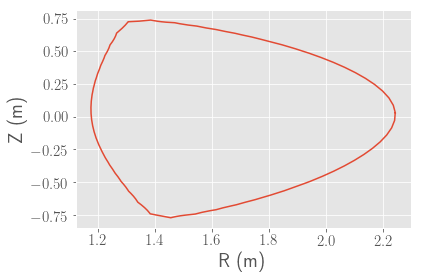

In [61]:
pxr.test_locator(0.999)

In [18]:
np.save("/net/scratch3/giannis_kx/pixie3d/tests/bonfiglio_div_tok/python_arrays/P_N_small.npy",pxr.P_N)

In [61]:
reload(pxr)

<module 'pixie_read_st' from '/turquoise/users/giannis_kx/python_pixie/pixie_read_st.py'>

In [27]:
pxr.Axes_of_Interpolation(pxr.P_N)

In [30]:
pxr.Grid_Interpolations(psi_pol)

Logical Grid Interpolations done. All array (A) interpolators take A_int.


In [31]:
pxr.Grids_Creation()

In [34]:
pxr.Grid_Evaluations()

Logical Grid Evaluations done. All grid evaluated interpolators take A_grid.


In [62]:
r_psi_list = pxr.r_psi_list()

In [63]:
np.save("/net/scratch3/giannis_kx/pixie3d/tests/bonfiglio_div_tok/python_arrays/r_of_psi.npy",r_psi_list)

<function matplotlib.pyplot.show>

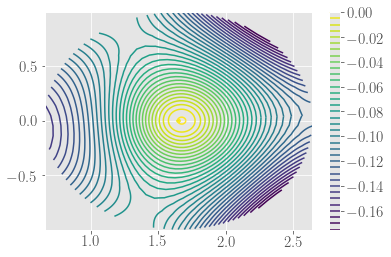

In [49]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],pxr.Psi_grid[:,:,0,0],40)
plt.colorbar()
plt.show

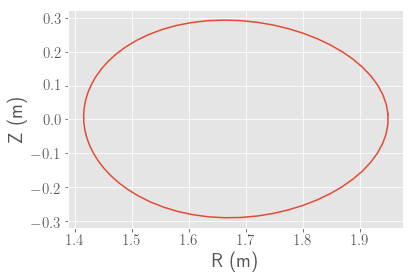

In [60]:
pxr.test_locator(0.4)

In [56]:
u

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 4.1859691940601174,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 18.355591462520202,
 19.0,
 19.903127328187704,
 20.0,
 21.0,
 21.134012759672384,
 22.0,
 22.2667471561168,
 23.0,
 23.392634479554211,
 24.0,
 24.574378645168526,
 25.0,
 25.885218244155617,
 26.0,
 27.0,
 27.492193981992067,
 28.0,
 29.0,
 29.942631052706293,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 34.355227103120249,
 35.0,
 36.0,
 36.851153851224346,
 37.0,
 38.0,
 38.44420948152915,
 39.0,
 39.759755344570294,
 40.0,
 40.939000907097217,
 41.0,
 42.0,
 42.063210985879941,
 43.0,
 43.203540458605922,
 44.0,
 44.445033706104752,
 45.0,
 45.951507805993963,
 46.0,
 47.0,
 48.0,
 49.0,
 49.976374084499,
 50.0,
 50.042222928787851,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 60.150334857769707,
 61.0,
 62.0,
 63.0,
 64.0]

## Saving data arrays

In [16]:
reload(pxr)

<module 'pixie_read_st' from '/turquoise/users/giannis_kx/python_pixie/pixie_read_st.py'>

In [14]:
pxr.pixieload_and_save(pxr.filepath)

# Loading and Preparing Data

In [24]:
reload(pxr)
pxr.Load_Presaved_Arrays()
pxr.Data_Load_And_Preparation()
pxr.Initial_Psi_Normalization()
pxr.Grids_And_Interpolations()
pxr.test_psi_normalization()
pxr.Load_Dictionary()
pxr.test_psi_projection()
#pxr.Double_Precision_Evaluation_Grid()
#pxr.Double_Precision_Grid_Evaluation()
#pxr.derivatives_and_interpolations()
#pxr.derivatives_and_interpolations_2_prec()

NameError: name 'filepath' is not defined

In [8]:
np.save('Z_saw.npy',pxr.Z)

In [4]:
(np.amin(pxr.Psi_f[:,:,0])-pxr.psi_min)/pxr.norm

-0.00058940814104201935

In [5]:
(np.amax(pxr.Psi_f[:,:,0])-pxr.psi_min)/pxr.norm

2.1711979758416327

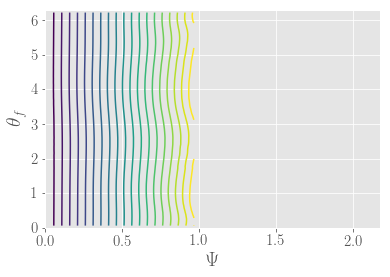

If field lines are straight, test passed.


In [4]:
pxr.test_psi_projection()

In [9]:
pxr.Jacobian()

In [47]:
reload(pxr)

<module 'pixie_read_st' from '/turquoise/users/giannis_kx/python_pixie/pixie_read_st.py'>

In [10]:
pxr.dB()

In [11]:
pxr.dB1.shape

(128, 65, 65, 1007)

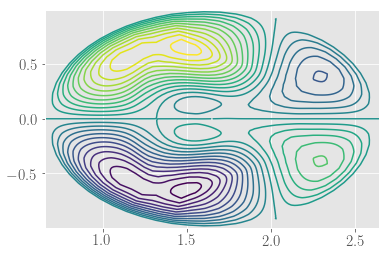

In [12]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],pxr.dB1[:,:,30,400],30)
plt.show()

In [13]:
pxr.dpdr.shape

(128, 65, 65)

In [53]:
brho = pxr.dB1[:,:,:,:]*pxr.dpdr[:,:,:,np.newaxis] + pxr.dB2[:,:,:,:]*pxr.dpdt[:,:,:,np.newaxis]

In [55]:
B30 = pxr.B3[:,:,:,0]

In [56]:
b_hat_rho = (pxr.q*brho)/B30[:,:,:,np.newaxis]

In [57]:
np.save('b_hat_rho.npy', b_hat_rho)

In [33]:
B1 = pxr.new_coords(pxr.loaded,pxr.B1_int,8)

In [34]:
B1_fun = B1(pxr.PS,pxr.TF)

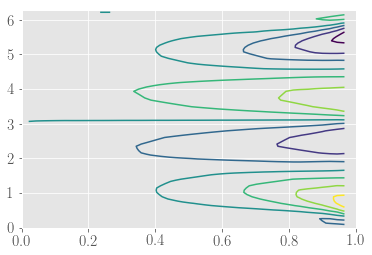

In [32]:
plt.contour(pxr.PS,pxr.TF, B1_fun[:,:])
plt.xlim(0,1)
plt.show()

## Projection of $\hat{b}^{\rho}$ with old function

In [9]:
b_hat_rho = np.load('/net/scratch3/giannis_kx/pixie3d/tests/bonfiglio_div_tok/python_arrays/b_hat_rho.npy')

In [12]:
pxr.Initial_Psi_Normalization()
pxr.Grids_And_Interpolations()
pxr.Load_Dictionary()

Initial psi normalization done...
Logical Grid Interpolations done. All array (A) interpolators take A_int.
Logical Grid Evaluations done. All grid evaluated interpolators take A_grid.
Dictionary loaded.


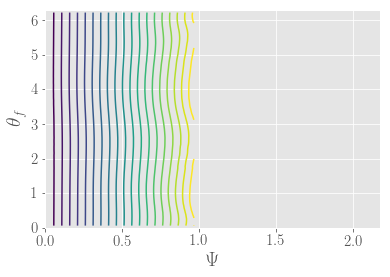

If field lines are straight, test passed.


In [30]:
pxr.test_psi_projection()

In [13]:
b_hat_rho.shape

(128, 65, 65, 1007)

In [16]:
pxr.X.shape

(128, 65, 65)

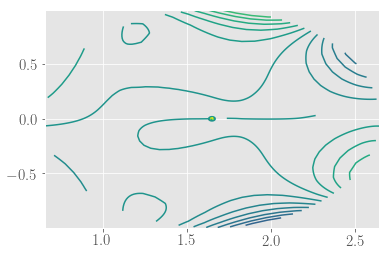

In [23]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],b_hat_rho[:,:,0,800],40)
plt.show()

In [25]:
from scipy.interpolate import RegularGridInterpolator

In [26]:
b_hat_int = RegularGridInterpolator((pxr.r,pxr.theta,pxr.phi,pxr.t), b_hat_rho[:,:,:,:], method='linear', bounds_error=False, fill_value = 0)

In [28]:
b_hat_proj=pxr.new_coords(pxr.loaded,b_hat_int,100)

In [31]:
b_hat_proj_fun = b_hat_proj(pxr.PS,pxr.TF)

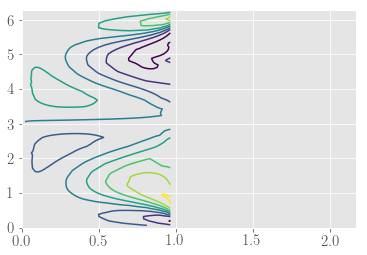

In [33]:
plt.contour(pxr.PS,pxr.TF,b_hat_proj_fun[:,:])
plt.show()

## Projection of $\hat{b}^{\rho}$ with new function

In [34]:
reload(pxr)

<module 'pixie_read_st' from '/turquoise/users/giannis_kx/python_pixie/pixie_read_st.py'>

In [35]:
b_hat_proj2 = pxr.new_coords2(pxr.loaded,b_hat_rho[:,:,0,:],100)

In [36]:
b_hat_proj_fun2 = b_hat_proj2(pxr.PS,pxr.TF)

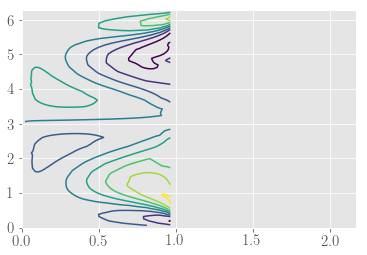

In [37]:
plt.contour(pxr.PS,pxr.TF,b_hat_proj_fun2[:,:])
plt.show()

### Try a different poloidal plane

In [38]:
b_hat_proj3 = pxr.new_coords2(pxr.loaded,b_hat_rho[:,:,3,:],100)

In [39]:
b_hat_proj_fun3 = b_hat_proj3(pxr.PS,pxr.TF)

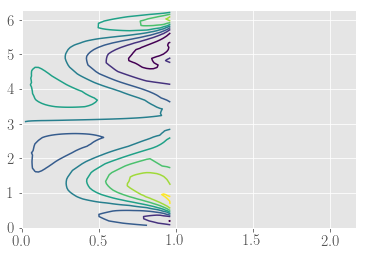

In [40]:
plt.contour(pxr.PS,pxr.TF,b_hat_proj_fun3[:,:])
plt.show()

In [41]:
np.save("test_save.npy",b_hat_proj_fun3)

NotImplementedError: MaskedArray.tofile() not implemented yet.

In [42]:
b_hat_proj_fun3.shape

(100, 100)

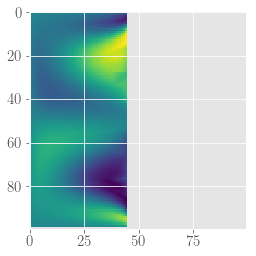

In [44]:
plt.imshow(b_hat_proj_fun3)
plt.show()

## Make new straight field line grid

In [45]:
Ps = np.linspace(0.0,1.0,100)
Tf = np.linspace(0.0,2.0*np.pi,100)
(PS,TF) = np.meshgrid(Ps,Tf)

In [46]:
b_hat_proj_fun33 = b_hat_proj3(PS,TF)

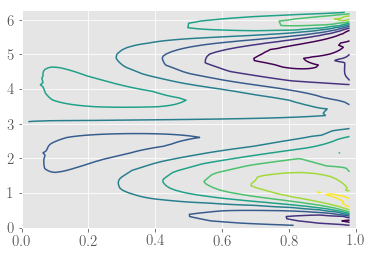

In [47]:
plt.contour(PS,TF,b_hat_proj_fun33[:,:])
plt.show()

In [50]:
b_hat_proj_fun33.dump("test_save")

In [51]:
test_save = np.load("test_save")

In [52]:
test_save.shape

(100, 100)

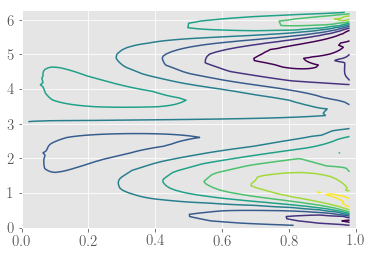

In [53]:
plt.contour(PS,TF,test_save[:,:])
plt.show()

## Stitch together in a single array

In [56]:
b_hat_proj_fun2.dump("test_save2")

In [57]:
test_save2 = np.load("test_save2")

In [58]:
test_save2.shape

(100, 100)

In [60]:
A0 = np.stack((test_save,test_save2),axis=0)

In [61]:
A0.shape

(2, 100, 100)

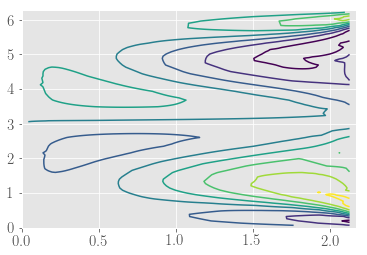

In [64]:
plt.contour(pxr.PS,pxr.TF,A0[0,:,:])
plt.show()

In [81]:
reload(pxr)

<module 'pixie_read_st' from '/turquoise/users/giannis_kx/python_pixie/pixie_read_st.py'>

In [82]:
pxr.Jacobian()

In [83]:
pxr.Jac.shape

(128, 65)

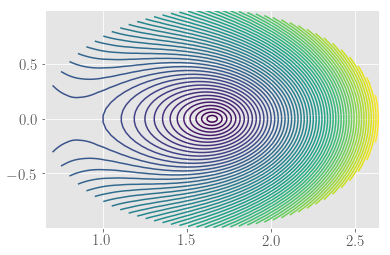

In [84]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],pxr.Jac[:,:],60)
plt.show()

In [109]:
import diagnostic

In [125]:
reload(diagnostic)

<module 'diagnostic' from '/turquoise/users/giannis_kx/python_pixie/diagnostic.py'>

In [126]:
reload(pxr)

<module 'pixie_read_st' from '/turquoise/users/giannis_kx/python_pixie/pixie_read_st.py'>

timesteps= 632
Dictionary of terms:
Variables: ['Car_variables', 'Cnv_variables', 'Cov_variables', 'Diagnostics', 'Perturbations', 'cells', 'nodes']
Cartesian: ['Bx', 'By', 'Bz', 'Jx', 'Jy', 'Jz', 'Prs', 'Ve_1', 'Ve_2', 'Ve_3', 'Vx', 'Vy', 'Vz', 'rho']
Contravariant: ['B^1', 'B^2', 'B^3', 'J*P^2', 'J.(pi+pe)', 'J.Rho', 'J^1', 'J^2', 'J^3', 'P^1', 'P^3']
Covariant: ['B_1', 'B_2', 'B_3', 'J_1', 'J_2', 'J_3', 'T=Te+Ti', 'V_1', 'V_2', 'V_3', 'rho']
Diagnostic: ['E_1', 'E_2', 'E_3', 'Int. heat src', 'Poloidal flux', 'Temperature', 'chi par', 'chi perp', 'diff', 'eta', 'lambda', 'local div(B)', 'local div(J)', 'local div(V)', 'nu', 'q factor']
Perturbations: ['B^1_pert', 'B^2_pert', 'B^3_pert', 'P^1_pert', 'P^2_pert', 'P^3_pert', 'Prs_pert', 'Rho_pert']
Cell: ['X', 'Y', 'Z']
Node: ['X', 'Y', 'Z']
Logical Grid Interpolations done. All array (A) interpolators take A_int.
0
1


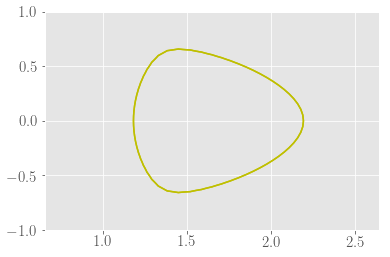

In [127]:
psi_min, norm, r_of_psi, r_ma, u_ma = diagnostic.main()

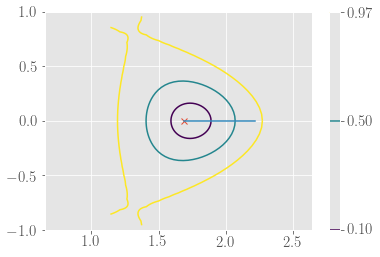

In [129]:
t=1
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],(psit[:,:,t]-psi_min[t])/(norm[t]-psi_min[t]),levels=[0.1,0.5,0.97])
plt.plot(pxr.X_int((r_ma[t],u_ma[t],0)),pxr.Z_int((r_ma[t],u_ma[t],0)),"x")
plt.plot(pxr.X_int((r_of_psi[t,:],0,0)),pxr.Z_int((r_of_psi[t,:],0,0)))
plt.colorbar()
plt.show()

In [39]:
psit,B1t,B2t,B3t = diagnostic.load_and_tranform()

timesteps= 632
Dictionary of terms:
Variables: ['Car_variables', 'Cnv_variables', 'Cov_variables', 'Diagnostics', 'Perturbations', 'cells', 'nodes']
Cartesian: ['Bx', 'By', 'Bz', 'Jx', 'Jy', 'Jz', 'Prs', 'Ve_1', 'Ve_2', 'Ve_3', 'Vx', 'Vy', 'Vz', 'rho']
Contravariant: ['B^1', 'B^2', 'B^3', 'J*P^2', 'J.(pi+pe)', 'J.Rho', 'J^1', 'J^2', 'J^3', 'P^1', 'P^3']
Covariant: ['B_1', 'B_2', 'B_3', 'J_1', 'J_2', 'J_3', 'T=Te+Ti', 'V_1', 'V_2', 'V_3', 'rho']
Diagnostic: ['E_1', 'E_2', 'E_3', 'Int. heat src', 'Poloidal flux', 'Temperature', 'chi par', 'chi perp', 'diff', 'eta', 'lambda', 'local div(B)', 'local div(J)', 'local div(V)', 'nu', 'q factor']
Perturbations: ['B^1_pert', 'B^2_pert', 'B^3_pert', 'P^1_pert', 'P^2_pert', 'P^3_pert', 'Prs_pert', 'Rho_pert']
Cell: ['X', 'Y', 'Z']
Node: ['X', 'Y', 'Z']


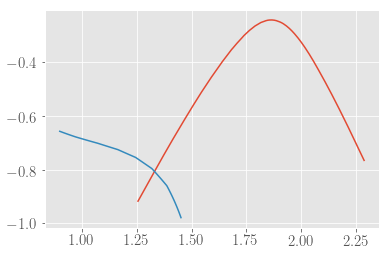

In [42]:
x1,y1,x2,y2 = pxr.findLevelsZero(B1t,B2t,0)

In [77]:
pxr.findXpoint(B1t,B2t,3)

IndexError: index 3 is out of bounds for axis 2 with size 3